# Lab 5: Visualization PCA

## Dataset: Appliances Energy Prediction

This dataset was chosen because it has multiple numeric values for its features, like temperature in many rooms in the home and the temperature for the weather outside. There are also features that deal with the wind and energy use inside the home. This data set was used to train a regression model, so it would be interesting to look into the variance in the data to see the variance in the data because this model was designed to predict the amount of energy the house would use based on the climate conditions.

In [15]:
#Import the libaries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Dataset for Appliances Energy Prediction
energy_data = pd.read_csv("energydata_complete.csv", sep=",")
#exclude the random variables
energy_data = energy_data.drop(columns=['rv1', 'rv2'])

#List of feature names of the temperature and humidity for the rooms
rm_temps = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
rm_hm = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

#Add features for the average temp and humidity for all rooms
energy_data['avg_RMtemp'] = energy_data[rm_temps].mean(axis=1)
energy_data['avg_RMhumidity'] = energy_data[rm_hm].mean(axis=1)

#Exclude all the room features due to it being too many features to analyze
X = energy_data.drop(columns=['date', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9'])
df = X.copy()
df.head(5)

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,avg_RMtemp,avg_RMhumidity
0,60,30,6.600000,733.5,92.0,7.000000,63.000000,5.3,17.167407,50.910741
1,60,30,6.483333,733.6,92.0,6.666667,59.166667,5.2,17.149630,50.827222
2,50,30,6.366667,733.7,92.0,6.333333,55.333333,5.1,17.103704,50.628889
3,50,40,6.250000,733.8,92.0,6.000000,51.500000,5.0,17.067037,50.574815
4,60,40,6.133333,733.9,92.0,5.666667,47.666667,4.9,17.070741,50.732963


In [16]:
#Create the covariace matrix 
# PCA is sensitive to scale, so we standardize the data first and centers data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# Compute the Covariance Matrix
# -------------------------
# The covariance matrix shows how variables vary with respect to each other
cov_matrix1 = np.cov(X_scaled, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix1)

Covariance Matrix:
[[ 1.00005067e+00  1.97287557e-01  9.91596753e-02 -3.48865968e-02
  -1.52290098e-01  8.71265207e-02  2.30369529e-04  1.53537885e-02
   7.82514595e-02 -6.02310743e-02]
 [ 1.97287557e-01  1.00005067e+00 -7.44279533e-02 -1.05769599e-02
   6.85462954e-02  6.02840829e-02  2.00387527e-02 -3.63242542e-02
  -8.46148140e-02  1.46081327e-01]
 [ 9.91596753e-02 -7.44279533e-02  1.00005067e+00 -1.43256065e-01
  -5.74225776e-01  1.92945811e-01 -7.73704383e-02  7.90701497e-01
   8.49385288e-01 -2.66116507e-01]
 [-3.48865968e-02 -1.05769599e-02 -1.43256065e-01  1.00005067e+00
  -9.20211826e-02 -2.35044168e-01  4.03169283e-02 -2.44110025e-01
  -1.59966963e-01 -1.95547743e-01]
 [-1.52290098e-01  6.85462954e-02 -5.74225776e-01 -9.20211826e-02
   1.00005067e+00 -1.76467276e-01  8.31292549e-02  3.65074539e-02
  -4.71057242e-01  6.73758014e-01]
 [ 8.71265207e-02  6.02840829e-02  1.92945811e-01 -2.35044168e-01
  -1.76467276e-01  1.00005067e+00 -7.51620981e-03  1.25978574e-01
  -5.30008405e

## Heat Map: Covaraince Matrix

For this visualization I calulated the covariance matrix by standarizeing it and excluding the features of temperature and humidity for each room and createing avearge temperature and hummidity. When creating this visualization, I thought there would be some strong linear connections that would be able to be seen between the features due to the nature of the data set being used to predict the energy use of the house.

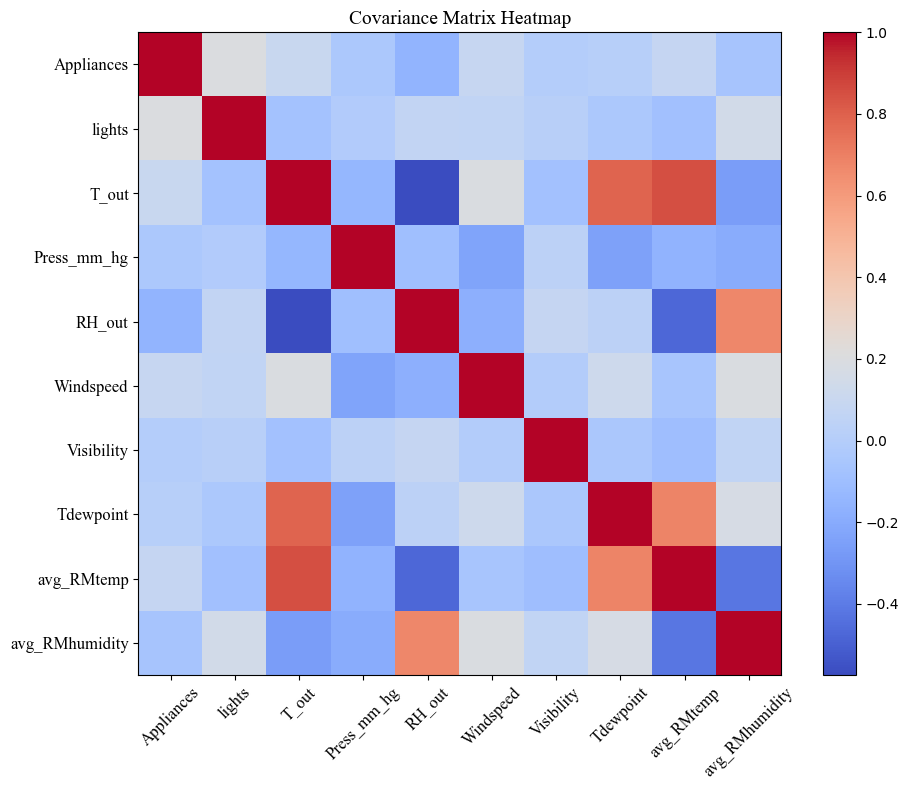

In [24]:
#Use feature names from the original DataFrame
feature_names = X.columns

#create the plot
fig = plt.figure(figsize=(10, 8))

#Plot the heatmap
plt.imshow(cov_matrix1, interpolation='none', cmap='coolwarm')

#Fix up the plot
plt.title("Covariance Matrix Heatmap", fontsize=14, fontname='Times New Roman')
plt.xticks(range(len(feature_names)), feature_names, rotation=45, fontname='Times New Roman', fontsize=12)
plt.yticks(range(len(feature_names)), feature_names, fontname='Times New Roman',fontsize=12)
plt.colorbar()
plt.tight_layout()
fig.savefig('Lab5_VicenteGarcia_CovarianceMatrixHeatmap.png')
plt.show()

### Observations

When looking at this heat map of the covariance matrix of this dataset, it seems that most of the map is shaded in blue, which indicates a negative correlation. This alos indicates that most of these weather conditions have the opposite effect on one another. It is also interesting to note the features that seem to have a positive effect, which are the temperature, temperature dewpoint, and humidity outside seem to have a positive effect on the average room temperature and humidity, respectively, which does seem to make a lot of sense.

In [18]:
# -------------------------
# Compute Eigenvalues and Eigenvectors
# -------------------------
# These describe the directions (eigenvectors) and magnitude (eigenvalues) of variance
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix1)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")

#Create the column names of the priciple components up until PC10
pc_labels = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

# Convert eigenvectors to DataFrame
eigenvectors_df = pd.DataFrame(
    eigenvectors,
    index=feature_names, #Use the feature names from the columns
    columns=pc_labels
)
print(eigenvectors_df.head())

Eigenvalues:
[3.00025192 1.80681652 0.0050124  0.11183976 0.25328359 1.27945514
 0.72850288 0.788295   1.04430515 0.98274439]
Eigenvectors:
                  PC1       PC2       PC3       PC4       PC5       PC6  \
Appliances   0.086953  0.012795  0.003611 -0.005360  0.029158  0.615532   
lights      -0.072427 -0.128498  0.001489 -0.030832  0.037687  0.531989   
T_out        0.552572 -0.122270  0.700058 -0.306387 -0.247929 -0.023612   
Press_mm_hg -0.098331  0.431592  0.002240  0.091712  0.073423 -0.088710   
RH_out      -0.384250 -0.404130  0.433405  0.002135  0.586217 -0.262509   

                  PC7       PC8       PC9      PC10  
Appliances  -0.488929  0.528065 -0.289434  0.104055  
lights       0.511149 -0.424440 -0.450000  0.221214  
T_out       -0.076781 -0.145863 -0.057217 -0.057344  
Press_mm_hg -0.574990 -0.594603 -0.312947 -0.016757  
RH_out      -0.101332  0.099240 -0.229997  0.124938  


## Eigenvalues Bar Plot

When after calculating the covariance matrix, we can also calculate the eigenvalues, which give us the PCA of the dataset. This visualization focuses on the eigenvalues of the dataset, which will tell us the principal components that capture the most variance in the data, and I expect this dataset to lose the variance after every principal.

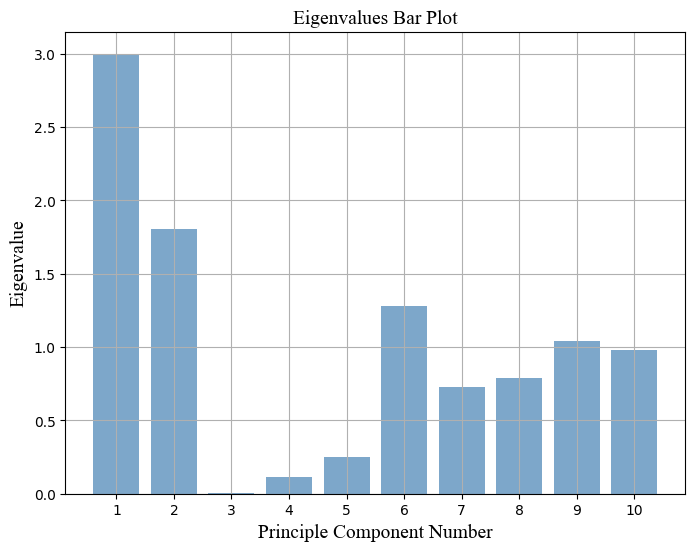

In [19]:
#Plot eigenvalues in a bar(scree) plot
plt.figure(figsize=(8, 6))
#Create a list witht he number of priciple compoents
components = np.arange(1, len(eigenvalues) + 1)

#Plot eigenvalues in a bar(scree) plot
plt.bar(components, eigenvalues, color='steelblue', alpha=0.7)

#Fix up the plot
plt.title('Eigenvalues Bar Plot', fontsize=14, fontname='Times New Roman')
plt.xlabel('Principle Component Number', fontsize=14, fontname='Times New Roman')
plt.ylabel('Eigenvalue', fontsize=14, fontname='Times New Roman')
plt.xticks(components) #Change the tick labels
plt.grid(True)
#Save the figure
fig.savefig('Lab5_VicenteGarcia_EigenvaluesBarPlot.png')
plt.show()

### Observations
When looking at this bar chart, it looks like the principal components that capture the most variance in the data seem to be PC1 and PC2. These values are determined by the covariance matrix. It is interesting to note that the next largest principal component seems to be PC6, which does seem a bit strange to me that these eigenvalues are not in order. An explanation for this could be that the linear combination of variables for PC6 captured the variance better. When observing the lowest principal component, which is PC3, there was an expectation that the eigenvalues would be in order from capturing the most to least variance. It would be interesting to investigate the reason.

## Eigenvectors Heatmap

This visualization is using a heatmap to see which features have relationships and variance captured in each PCA. When creating this visualization, I expected most of the columns for PC1, PC2, and PC6 to have the most linear combinations due to them being the highest eigenvalue principal components.

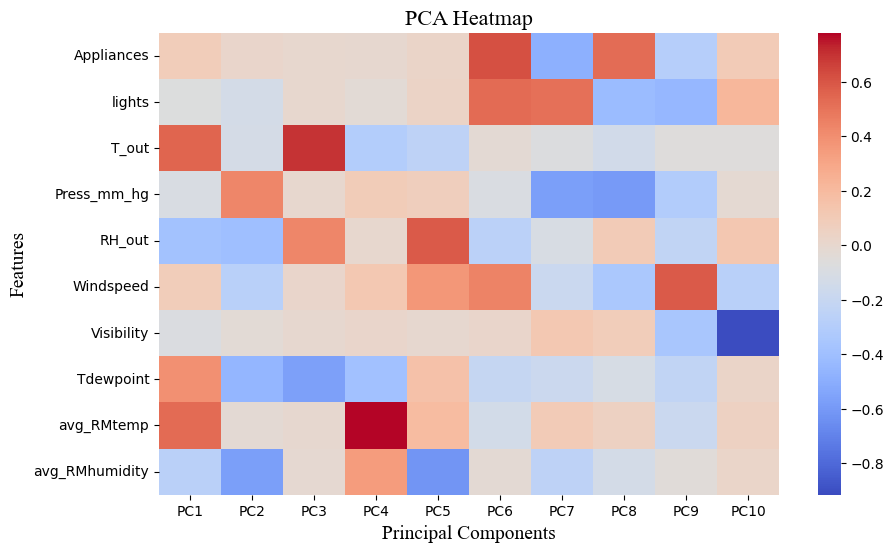

In [23]:
#Import seaborn
import seaborn as sns

#Create the plot
plt.figure(figsize=(10, 6))

#Use a seaborn plot to make ploting the PCA easier
sns.heatmap(eigenvectors_df, annot=False, cmap='coolwarm', cbar=True)

#Fix up the plot
plt.title('PCA Heatmap', fontsize=16, fontname='Times New Roman')
plt.xlabel('Principal Components', fontsize=14, fontname='Times New Roman')
plt.ylabel('Features', fontsize=14, fontname='Times New Roman')
#Save the plot
fig.savefig('Lab5_VicenteGarcia_PCAHeatmap.png')
plt.show()

### Observation

Looking at this heat map visualization of the principal components compared to the features in the dataset, it seems that there are a lot fewer correlations between the features and eigenvectors overall. When looking at the three strongest principal components based on the previous plot, there seem to be a lot of correlations of features in the principal components that have high eigenvalues. This visualization also gives more insight as to why PC3 has the lowest eigenvalue, due to it not having much variation in the dataset, therefore it being reflected in only three features having somewhat of a strong correlation.

## Scatter Plot of the PCA

For this data visualization, only the first two principal components are used due to them capturing the most variance in the data determined by their eigenvalues. In this data visualization, I expected not to really see any clustering due to there not being much of a relationship between the features shown by the covariance matrix heat map.

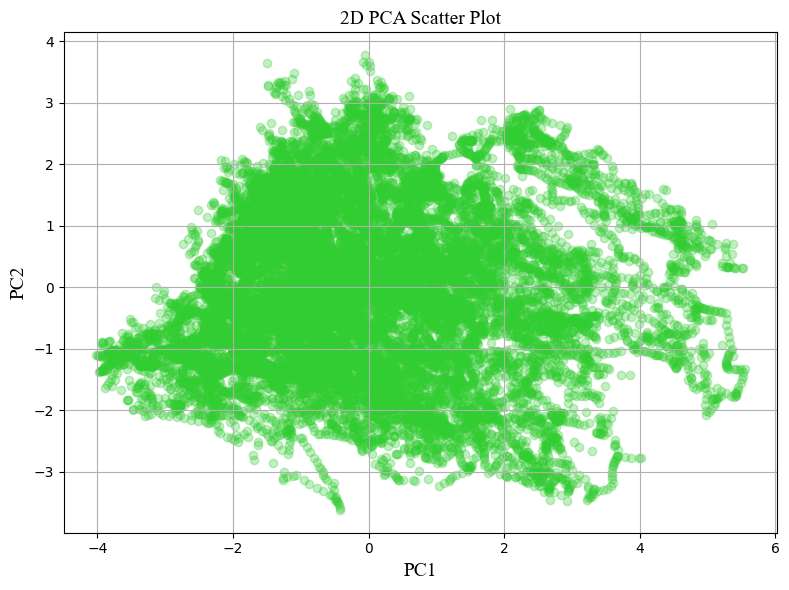

In [21]:
#import the needed libary to create the pca for 
from sklearn.decomposition import PCA

#Create a pca dataset for the scatterplot
pca2d = PCA(n_components=2)
X_pca= pca2d.fit_transform(X_scaled)
pca2d_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

#Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='limegreen', alpha=0.3)

#Fix up the plot
plt.title('2D PCA Scatter Plot', fontsize=14, fontname='Times New Roman')
plt.xlabel('PC1', fontsize=14, fontname='Times New Roman')
plt.ylabel('PC2', fontsize=14, fontname='Times New Roman')
plt.grid(True)
plt.tight_layout()
fig.savefig('Lab5_VicenteGarcia_2DPCAScatterPlot.png')
plt.show()


### Observations 

When looking at this scatter plot of the first two principal components, it seems that most data of the first two principal components seem to be evenly spread out between the two principal components, with most data being at a midpoint for both. Another observation made is the cluster of data that forms around the PC1 value of 4 and PC2 value of 2 in the top right corner, which could point to some very close similarities in those points in the data showing some kind of pattern that the data may be following.

## 3D Scatter Plot of the PCA

For this data visualization, use PC1, PC2, and PC6 due to them being the three principal components with the highest eigenvalues, which would probably be best to capture the most dimensionality. Using a 3D scatter plot will also allow me to see how the data is spread out in the previous 2D scatter plot, which will show more of how the clusters in the dataset spread with the third dimension that is added.

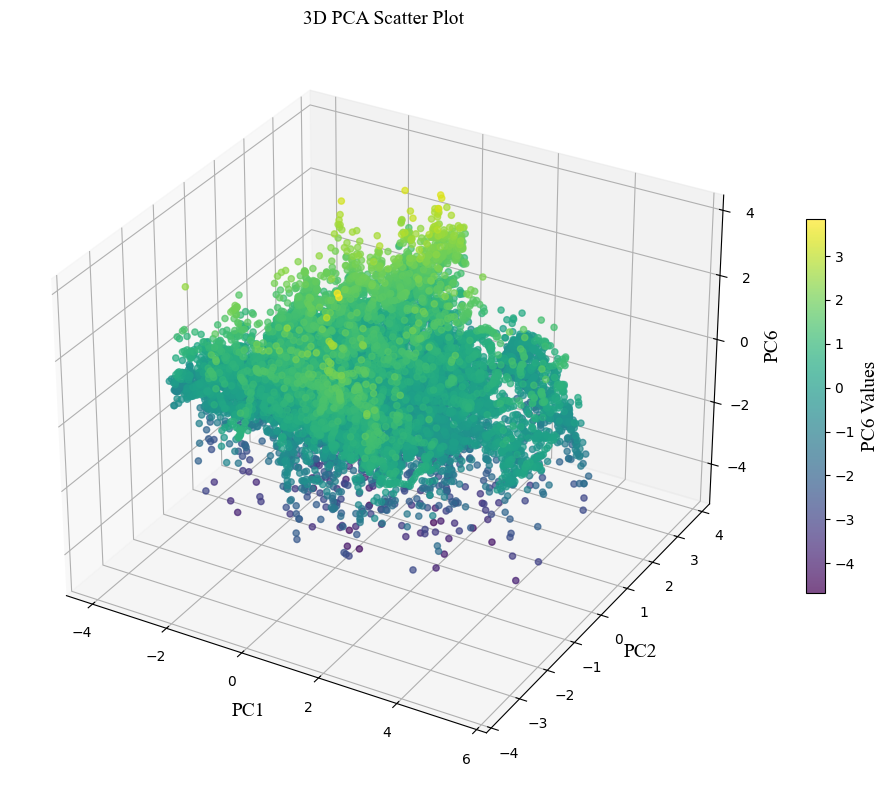

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

#Create a pca dataset for the scatterplot with 6 compents becuase we are using PC6
pca = PCA(n_components=6)  
X_pca = pca.fit_transform(X_scaled)

#Create the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Scatter plot using PC1, PC2, and PC6 and a gradient based on PC6
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 5], c=X_pca[:, 5], cmap='viridis', alpha=0.7)

#Fix up the plot
ax.set_title('3D PCA Scatter Plot', fontsize=14, fontname='Times New Roman')
ax.set_xlabel('PC1', fontsize=14, fontname='Times New Roman')
ax.set_ylabel('PC2', fontsize=14, fontname='Times New Roman')
ax.set_zlabel('PC6', fontsize=14, fontname='Times New Roman', rotation = 90)
#Add color bar to show the gradient
cbar = plt.colorbar(scatter, shrink=0.5)
cbar.set_label('PC6 Values', fontsize=14, fontname='Times New Roman')

#save the plot
plt.tight_layout()
fig.savefig('Lab5_VicenteGarcia_3DPCAScatterPlot.png')
plt.show()


### Observations

Looking at this 3D scatter plot, there is more insight gained from the previous 2D scatter plot. When adding another point in dimensionality with the z-axis of PC6, it can be seen that most of the data seems to be evenly spread overall, which points to a good amount of variance and consistency. Also, when looking at the gradient of the data, you can see that when it comes to points in variance of PC6, there don't seem to be many points that are outliers, so most of the data falls within the expected range.